In [1]:
from utils import load_pairs, get_top_pairs
ncc_pairs = load_pairs('results/ncc_pairs.json')
top_pairs = get_top_pairs(ncc_pairs, 50)

In [2]:
from homography import RANSAC
ransac = RANSAC(top_pairs)

In [ ]:
affine, inliers = ransac.adaptively_fit(0.8, 5, num_pairs = 3)


FITTING!!
inf 15


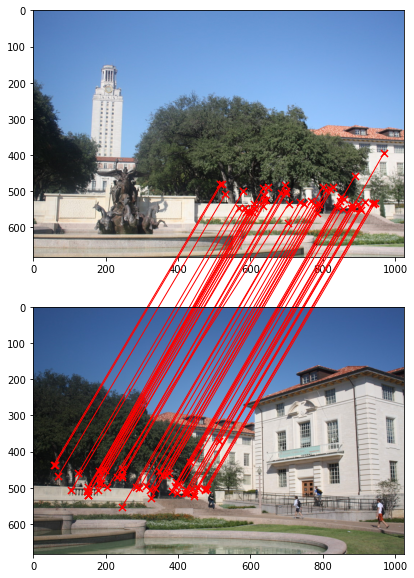

In [46]:
from utils import draw_matches
from utils import load_image, visualize_image

left = load_image('uttower_left.jpg')
right = load_image('uttower_right.jpg')
draw_matches(left, right, list(sensible_pairs.keys()), set_inches=(10,10))

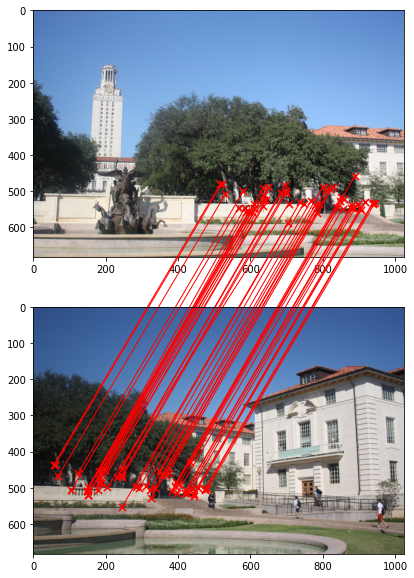

In [47]:
from utils import draw_matches
from utils import load_image, visualize_image

left = load_image('uttower_left.jpg')
right = load_image('uttower_right.jpg')
draw_matches(left, right, g[1], set_inches=(10,10))

# Image Stitching (need better code)

In [62]:

dark_2 = np.zeros((1500, 2500, 3))
        

        
dark_1 = np.zeros((1500, 2500, 3))

for x in range(right.shape[1]):
    for y in range(right.shape[0]):
        proj = np.dot(np.linalg.inv(g[0]), np.asarray([[x],[y],[1]]))
        x_new = proj[0,0]/proj[2,0]
        y_new = proj[1,0]/proj[2,0]
        
        # x_new = x
        # y_new = y
        
        del_dark_x = dark_2.shape[1]//2 - right.shape[1]//2
        del_dark_y = dark_2.shape[0]//2 - right.shape[0]//2
        
        x_proj = x_new + del_dark_x
        y_proj = y_new + del_dark_y
        
        dark_2[int(y_proj), int(x_proj), :] = right[y, x, :]
        
for x in range(left.shape[1]):
    for y in range(left.shape[0]):
        del_dark_x = dark_2.shape[1]//2 - left.shape[1]//2
        del_dark_y = dark_2.shape[0]//2 - left.shape[0]//2
        
        # proj = np.dot(g[0], np.asarray([[x],[y ],[1]]))
        # x_new = proj[0,0]/proj[2,0]
        # y_new = proj[1,0]/proj[2,0]
        
        x_new = x
        y_new = y
        
        
        x_proj = x_new + del_dark_x
        y_proj = y_new + del_dark_y
        
        dark_1[int(y_proj), int(x_proj), :] = left[y, x, :]

dark = (dark_1+ dark_2)/2

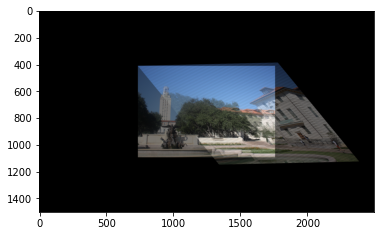

In [63]:
import matplotlib.pyplot as plt
plt.imshow(dark/dark.max())

In [14]:
np.dot(np.linalg.inv(g[0]), np.asarray([[395],[516],[1]]))

array([[863.75380311],
       [549.74295452],
       [  1.        ]])

In [15]:
np.dot(g[0], np.asarray([[852],[548],[1]]))

array([[384.94824234],
       [514.23266412],
       [  1.        ]])

In [53]:
points = [(5, 5),(0, 0),(5, 0),(0, 5)]

In [54]:
new_points = []
for point in points:
    new_points.append((point[0] + 5, point[1] - 4))

In [55]:
new_points

[(10, 1), (5, -4), (10, -4), (5, 1)]

In [56]:
group = []
for i in range(4):
    group.append((points[i], new_points[i]))

In [57]:
group

[((5, 5), (10, 1)), ((0, 0), (5, -4)), ((5, 0), (10, -4)), ((0, 5), (5, 1))]

In [63]:
s, d = r._generate_source_destination_matrix(group)

In [64]:
a = r._get_affine_parameters(s, d)

In [65]:
a

array([[ 2.22833807,  1.09197443, -3.203125  ],
       [-1.01740057,  0.11896307,  2.984375  ],
       [ 0.        ,  0.        ,  1.        ]])

In [67]:
np.dot(a, np.asarray([[5],[5],[1]]))

array([[13.3984375],
       [-1.5078125],
       [ 1.       ]])